In [3]:
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt

Завдання 2

In [5]:
data = fetch_california_housing()
X, y = data.data, data.target
df = pd.DataFrame(data=X, columns=data.feature_names)
df['target'] = y
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
#1. Провести попередній аналіз даних за схемою (дивиться вище).
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [7]:
df.duplicated().sum()

0

In [8]:
df.dtypes

,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
target,float64


In [9]:
#2. Масштабувати ознаки.
X = df.drop('target', axis=1)
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
#3. Поділити дані на тренувальні і тестові.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
#4. Побудувати 3 моделі: лін. Регресія, регресія випадковий ліс, Ridge.Підібрати оптимальні параметри за допомогою GridSeach.
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest Regressor': RandomForestRegressor()
}
param_grids = {
    'Ridge Regression': {
        'alpha': [0.1, 1, 10]
    },
    'Random Forest Regressor': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20]
    }
}

best_models = {}

In [12]:
#5. Вивести R2 і MSE. Побудувати графіки.
for name, model in models.items():
    print(f"\nНалаштування параметрів для {name}...")
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"Найкращі параметри для {name}: {grid_search.best_params_}")
    else:
        best_models[name] = model.fit(X_train, y_train)
        print(f"{name} не потребує налаштування параметрів.")

# Оцінка моделей
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\nОцінка {name}:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")


Налаштування параметрів для Linear Regression...
Linear Regression не потребує налаштування параметрів.

Налаштування параметрів для Ridge Regression...
Найкращі параметри для Ridge Regression: {'alpha': 0.1}

Налаштування параметрів для Random Forest Regressor...
Найкращі параметри для Random Forest Regressor: {'max_depth': 20, 'n_estimators': 200}

Оцінка Linear Regression:
Mean Squared Error: 0.56
R^2 Score: 0.58

Оцінка Ridge Regression:
Mean Squared Error: 0.56
R^2 Score: 0.58

Оцінка Random Forest Regressor:
Mean Squared Error: 0.25
R^2 Score: 0.81


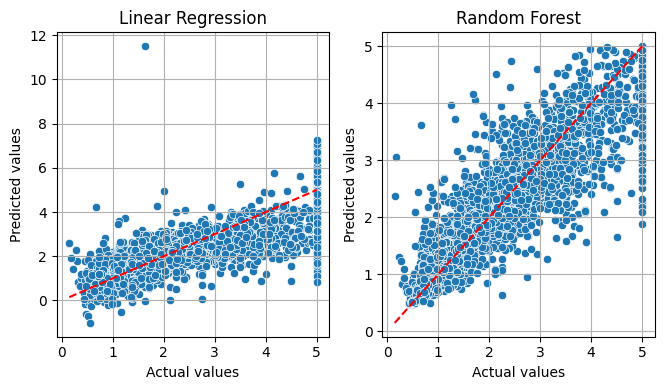

In [13]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=best_models['Linear Regression'].predict(X_test))
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression')
plt.grid(True)
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=best_models['Random Forest Regressor'].predict(X_test))
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Random Forest')
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
#6. Вивести справжні і прогнозовані значення.
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'Latitude', 'Longitude']]
y = df['AveOccup']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
mse1 = mean_squared_error(y_test, y_pred)
r21 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse1}")
print(f"R^2 Score: {r21}")
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
results = results.sort_values(by='Predicted', ascending=False)

print("\nSorted Results:")
print(results)

Mean Squared Error: 4.021361780252966
R^2 Score: -0.30845308361791934

Sorted Results:
         Actual  Predicted
10309  3.106957  16.010953
1979   2.400000  12.815763
13890  6.630357  11.801510
20451  3.437608  11.480728
17413  4.397381  10.996597
...         ...        ...
12123  2.346939   0.035212
11716  2.273585  -0.091321
11833  2.759843  -0.505939
18506  7.200000  -0.882860
12136  3.273810  -1.158865

[4128 rows x 2 columns]
